---
layout: post
title: Legendre transformations visualized
description: "much more than algebraic manipulations"
date: 2026-01-31
author: Yair Mau
toc: true
format:
  html:
    code-fold: true
    code-summary: "Show the code"
image: arnold43.png
categories: [math, physics]
---

Inspired by Dan Kosakowski's youtube video, [A Simple yet Powerful Math Trick ](https://youtu.be/P2HZelQm7Lw?si=vBaUeWywBtDsBIZq){target="_blank"}.  
Folow his youtube channel, [Abide by Reason](https://www.youtube.com/@AbideByReason){target="_blank"}, it's very good.

useful sources:

* [Legendre transforms by Mark Alford](https://web.physics.wustl.edu/alford/physics/Legendre_introduction.pdf){target="_blank"}, read caption of figure 2
* [Legendre Transforms for Dummies, by Carl E. Mungan](https://www.aapt.org/docdirectory/meetingpresentations/sm14/mungan-poster.pdf){target="_blank"}. figure 1 is very good. The discussion in section "Inverse Legendre transform" is insightful, see especially Equation 14.
* [The Legendre Transform, by David Glickenstein](https://math.arizona.edu/~glickenstein/tex/legendre.pdf){target="_blank"} involution
* [R. K. P. Zia, Edward F. Redish, and Susan R. McKay. Making sense of the legendre
transform. American Journal of Physics, 2009](https://academicweb.nd.edu/~powers/ame.20231/zia.pdf){target="_blank"}
* [A graphical derivation of the Legendre transform, by Sam Kennerly](https://web.archive.org/web/20231223213826/https://www.physics.drexel.edu/~skennerly/maths/Legendre.pdf){target="_blank"}

## motivation

It is hard to give good motivations for the Legendre transform without goint into the physics of thermodynamics or classical mechanics. I'll do that in another post. I'll try to give here a mathematical motivation, which is to say, let's clearly state what is the problem we would like to solve.

Suppose we have a function $f(x)$. We can compute its derivative $p = \frac{df}{dx}$. Can we express **the same information** contained in $f(x)$ through a new function $g(p)$? What do I mean by "the same information"?

**Involution**  
Starting from $f(x)$, we compute $g(p)$ with a given procedure (to be found below). Applying **the same procedure** to $g(p)$ gives us back $f(x)$. $f(x)$ and $g(p)$ are but the sides of the same coin. By flipping the coin twice, we get back to where we started. This is what involution means.

**Conjugate variable swap**  
The independent variable of $g$ is $p$, and it is defined as the derivative $df/dx$. The independent variable of $f$ is $x$, and it is defined as the derivative $dg/dp$. So the roles of dependent and independent variables are swapped, but in a very specific way.

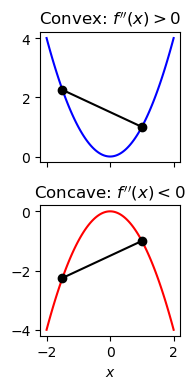

In [20]:
#| label: fig-convex-concave
#| fig-cap: "Comparison of Convex and Concave functions."
#| column: margin
#| echo: false

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2, 2, 100)
f_convex = lambda x: x**2
f_concave = lambda x: -x**2

fig, ax = plt.subplots(2, 1, figsize=(2, 4), sharex=True)

ax[0].plot(x, f_convex(x), 'b-')
ax[0].set_title("Convex: $f''(x) > 0$")
ax[0].plot([-1.5, 1], [f_convex(-1.5), f_convex(1)], 'ko-', label='Chord')

ax[1].plot(x, f_concave(x), 'r-')
ax[1].set_title("Concave: $f''(x) < 0$")
ax[1].plot([-1.5, 1], [f_concave(-1.5), f_concave(1)], 'ko-', label='Chord')
ax[1].set_xlabel("$x$")

plt.tight_layout()

**Uniqueness**  
The original function $f(x)$ **has to be convex** (or concave) for the Legendre transform to be defined. Convexity (concavity) means that the second derivative is positive (negative). A geometric way to understand convexity is that if we draw a line between any two points of the graph of $f(x)$, the line lies always above (or below) the graph. If this requirement is not satisfied, the mapping between $x$ and $p$ is no longer one-to-one, meaning we can no longer uniquely reconstruct the original function $f(x)$ from $g(p)$.

The challenge, then, is to find a mathematical operation that satisfies all three criteria: it must be an involution, it must swap the variable with the derivative, and it must rely on the unique curvature of the function.

## a practical example that doesn't work

I'm following here Dan Kosakowski's arguments, from his youtube video, [A Simple yet Powerful Math Trick ](https://youtu.be/P2HZelQm7Lw?si=vBaUeWywBtDsBIZq){target="_blank"}.

We start with a function $f(x)$. For this practical example we'll choose a parabola. In panel **a** below, we plot the function

$$
f(x) = x^2.
$$

We then define the slope of the function as

$$
p = \frac{df}{dx}.
$$

Panel **b** shows that if we draw tangent lines to $f(x)$, them make a nice envelope of the function itself, and that is a clue that maybe we can describe the function $f$ in terms of $p$ instead of $x$.

In [2]:
#| code-summary: "import libraries"
import numpy as np
import matplotlib.pyplot as plt

In [21]:
#| code-summary: "define useful functions"
def f(x):
    return x**2
def f_inverse(p):
    return (p/2)**2
def f2(x):
    return (x - 1)**2

def f_prime(x):
    return 2 * x
def f_prime2(x):
    return 2 * (x - 1)

def tangent_line(x, x0):
    return f_prime(x0) * (x - x0) + f(x0)
def tangent_line2(x, x0):
    return f_prime2(x0) * (x - x0) + f2(x0)

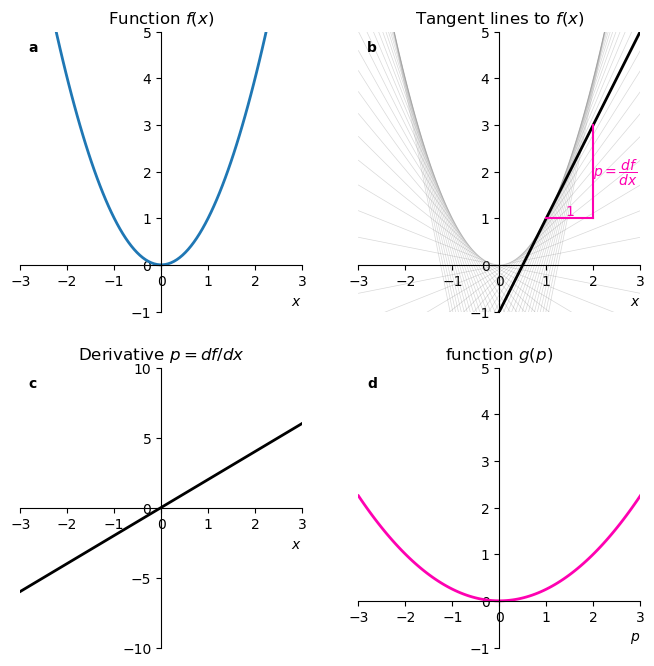

In [22]:
#| code-summary: "plot"
fig, axx = plt.subplots(2, 2, figsize=(8,8))

ax = axx.flatten()
x = np.linspace(-3, 3, 100)

ax[0].plot(x, f(x), label='$f(x) = x^2$', color='tab:blue', lw=2)

x0_values = np.arange(-2.5, 2.6, 0.1)
for x0 in x0_values:
    ax[1].plot(x, tangent_line(x, x0), color='gray', alpha=0.3, lw=0.5)
ax[1].plot(x, tangent_line(x, 1), color='black', lw=2)
x1, x2 = 1, 2
y1, y2 = tangent_line(x1, 1), tangent_line(x2, 1)
ax[1].plot([x1, x2], [y1, y1], color='xkcd:bright pink')
ax[1].plot([x2, x2], [y1, y2], color='xkcd:bright pink')
ax[1].text(x1+(x2-x1)/2, f(x1), '1', va='bottom', ha='center', color='xkcd:bright pink')
ax[1].text(x2, y1 + (y2-y1)/2,
           r'$p=\dfrac{df}{dx}$', va='center', ha='left', color='xkcd:bright pink')

for axis in ax[[0,1]]:
    axis.spines['left'].set_position('zero')
    axis.spines['bottom'].set_position('zero')
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.set(xlim=(x[0], x[-1]),
             ylim=(-1, 5),
             xticks=np.arange(-3, 4, 1),
             yticks=np.arange(-1, 6, 1)
             )
    axis.set_xlabel('$x$', loc='right')

ax[0].set_title('Function $f(x)$')
ax[0].set_xlabel('$x$', loc='right')
ax[1].set_title('Tangent lines to $f(x)$')
# ax[1].set_xlabel('$x$')

ax[2].plot(x, f_prime(x), label=r"$f'(x) = 2x$", color='black', lw=2)
ax[2].spines['left'].set_position('zero')
ax[2].spines['bottom'].set_position('zero')
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].set(xlim=(x[0], x[-1]),
            ylim=(-10, 10),
            xticks=np.arange(-3, 4, 1),
            yticks=np.arange(-10, 11, 5),
            title="Derivative $p=df/dx$"
            )
ax[2].set_xlabel('$x$', loc='right')

p = np.linspace(-3, 3, 100)
ax[3].plot(p, f_inverse(p), label=r"$g(p) = \left(\frac{p}{2}\right)^2$", color='xkcd:bright pink', lw=2)
ax[3].spines['left'].set_position('zero')
ax[3].spines['bottom'].set_position('zero')
ax[3].spines['right'].set_visible(False)
ax[3].spines['top'].set_visible(False)
ax[3].set(xlim=(p[0], p[-1]),
            ylim=(-1, 5),
            xticks=np.arange(-3, 4, 1),
            yticks=np.arange(-1, 6, 1),
            title="function $g(p)$",
            )
ax[3].set_xlabel('$p$', loc='right');

ax[0].text(0.03, 0.97, r"a", transform=ax[0].transAxes,
         horizontalalignment='left', verticalalignment='top',
         fontweight="bold")
ax[1].text(0.03, 0.97, r"b", transform=ax[1].transAxes,
         horizontalalignment='left', verticalalignment='top',
         fontweight="bold")
ax[2].text(0.03, 0.97, r"c", transform=ax[2].transAxes,
         horizontalalignment='left', verticalalignment='top',
         fontweight="bold")
ax[3].text(0.03, 0.97, r"d", transform=ax[3].transAxes, 
         horizontalalignment='left', verticalalignment='top',
         fontweight="bold");

Differentiating $x^2$ gives us a relation between $u$ and $x$:

$$
p(x) = 2x,
$$

which can be seen in panel **c**.

Because this is a one-to-one relation, that is, for each $x$ there is a unique $p$ and vice versa, we can invert this relation to express $x$ in terms of $p$:

$$
x(p) = \frac{p}{2}
$$

We need now a function $g(p)$. A first guess of what $g(p)$ could be is:

$$
g(p) = f(x(p)) = \left(\frac{p}{2}\right)^2 = \frac{p^2}{4}.
$$

This last function is plotted in panel **d**.

Alas, our choice for the procedure $g(p) = f(x(p))$ is not a good one. To see why, we can try doing the procedure again, this time on a right-shifted version of $f$:

$$
f_2(x) = (x - a)^2.
$$

The derivative of this new function defines $p$:

\begin{align*}
p &= \frac{df_2}{dx} \\
& = \frac{d}{dx} (x - a)^2 \\
& = 2(x-a).
\end{align*}

Expressing now $x$ in terms of $p$ gives

$$
x(p) = \frac{p}{2} + a.
$$

Finally, we substitute $x(p)$ back into $f_2$ to get

\begin{align*}
g_2(p) &= f_2(x(p)) \\
&= (x(p) - a)^2 \\
&= \left(\frac{p}{2} + a - a\right)^2 \\
&= \frac{p^2}{4}.
\end{align*}

This is exactly the same function we had before shifting the original function!
We completely lost the information that the parabola was shifted. See panel **d** below, it is identical to panel **d** in the previous example.

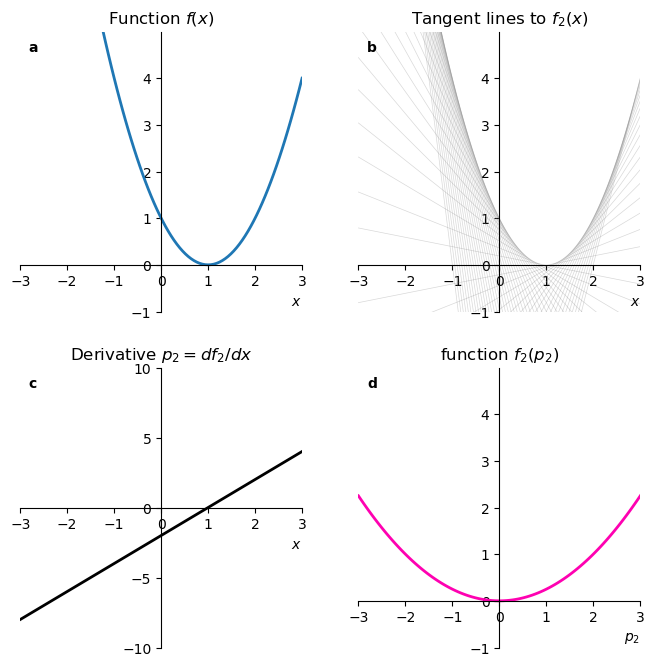

In [24]:
#| code-summary: "plot"
fig, axx = plt.subplots(2, 2, figsize=(8,8))

ax = axx.flatten()
x = np.linspace(-3, 3, 100)

ax[0].plot(x, f2(x), label='$f_2(x) = \cosh(x - 1)$', color='tab:blue', lw=2)

x0_values = np.arange(x[0], x[-1]+0.1, 0.1)
for x0 in x0_values:
    ax[1].plot(x, tangent_line2(x, x0), color='gray', alpha=0.3, lw=0.5)

for axis in ax[[0,1]]:
    axis.spines['left'].set_position('zero')
    axis.spines['bottom'].set_position('zero')
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.set(xlim=(x[0], x[-1]),
             ylim=(-1, 5),
             xticks=np.arange(-3, 4, 1),
             yticks=np.arange(-1, 5, 1)
             )
    axis.set_xlabel('$x$', loc='right')

ax[0].set_title('Function $f(x)$')
ax[0].set_xlabel('$x$', loc='right')
ax[1].set_title('Tangent lines to $f_2(x)$')
# ax[1].set_xlabel('$x$')

ax[2].plot(x, f_prime2(x), label=r"$f'(x) = \sinh(x-1)$", color='black', lw=2)
ax[2].spines['left'].set_position('zero')
ax[2].spines['bottom'].set_position('zero')
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].set(xlim=(x[0], x[-1]),
            ylim=(-10, 10),
            xticks=np.arange(-3, 4, 1),
            yticks=np.arange(-10, 11, 5),
            title="Derivative $p_2=df_2/dx$"
            )
ax[2].set_xlabel('$x$', loc='right')

p = np.linspace(-3, 3, 100)
ax[3].plot(p, f_inverse(p), label=r"$f_2(x(p)) = \cosh(\sinh^{-1}(p))$", color='xkcd:bright pink', lw=2)
ax[3].spines['left'].set_position('zero')
ax[3].spines['bottom'].set_position('zero')
ax[3].spines['right'].set_visible(False)
ax[3].spines['top'].set_visible(False)
ax[3].set(xlim=(p[0], p[-1]),
            ylim=(-1, 5),
            xticks=np.arange(-3, 4, 1),
            yticks=np.arange(-1, 5, 1),
            title="function $f_2(p_2)$",
            )
ax[3].set_xlabel('$p_2$', loc='right');

ax[0].text(0.03, 0.97, r"a", transform=ax[0].transAxes,
         horizontalalignment='left', verticalalignment='top',
         fontweight="bold")
ax[1].text(0.03, 0.97, r"b", transform=ax[1].transAxes,
         horizontalalignment='left', verticalalignment='top',
         fontweight="bold")
ax[2].text(0.03, 0.97, r"c", transform=ax[2].transAxes,
         horizontalalignment='left', verticalalignment='top',
         fontweight="bold")
ax[3].text(0.03, 0.97, r"d", transform=ax[3].transAxes, 
         horizontalalignment='left', verticalalignment='top',
         fontweight="bold");

 Just for completeness, let's go back from $g_2(p)$ to $f_2(x)$:

\begin{align*}
x &= \frac{dg_2}{dp} \\
&= \frac{d}{dp} \left(\frac{p}{2}\right)^2 \\
&= \frac{p}{2},
\end{align*}

And now:

$$
f_2(x) = g_2(p(x)) = g_2(2x) = \left(\frac{2x}{2}\right)^2 = x^2,
$$

which is not the shifted parabola we started with.

## y-intercept, not slope

We learned that using the slope $p = df/dx$ to define a new function $g(p)=f(x(p))$ does not work. Instead, let's try using the y-intercept of the tangent line as our function $-g(p)$. The negative sign here will be justified later.
The general equation for the tangent line is

$$
y = mx - g.
$$

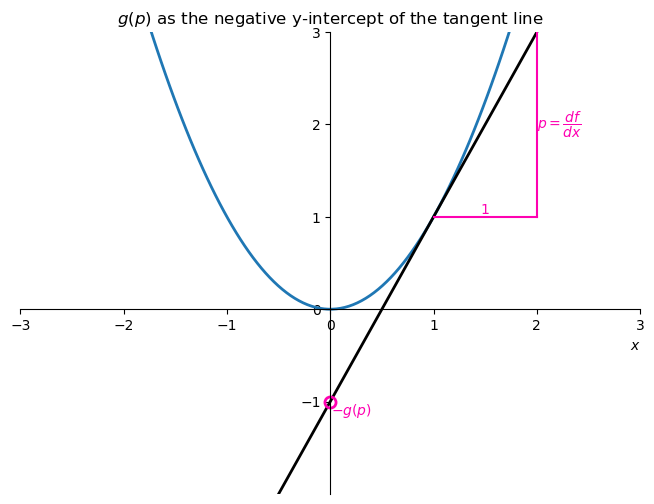

In [27]:
#| code-summary: "plot"
fig, ax = plt.subplots(figsize=(8,6))

x = np.linspace(-2, 2, 100)

ax.plot(x, f(x), color='tab:blue', lw=2)

ax.plot(x, tangent_line(x, 1), color='black', lw=2)
x1, x2 = 1, 2
y1, y2 = tangent_line(x1, 1), tangent_line(x2, 1)
ax.plot([x1, x2], [y1, y1], color='xkcd:bright pink')
ax.plot([x2, x2], [y1, y2], color='xkcd:bright pink')
ax.plot([0,], [-1], ls='None', marker='o',
        mec='xkcd:bright pink', mfc="None", markersize=8, markeredgewidth=2)
ax.text(0.4, -1, r'$-g(p)$', va='top', ha='right', color='xkcd:bright pink')
ax.text(x1+(x2-x1)/2, f(x1), '1', va='bottom', ha='center', color='xkcd:bright pink')
ax.text(x2, y1 + (y2-y1)/2,
        r'$p=\dfrac{df}{dx}$', va='center', ha='left', color='xkcd:bright pink')

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set(xlim=(x[0], x[-1]),
            ylim=(-2, 3),
            xticks=np.arange(-3, 4, 1),
            yticks=np.arange(-1, 4, 1),
            title=r"$g(p)$ as the negative y-intercept of the tangent line"
            )
ax.set_xlabel('$x$', loc='right');

The slope $m$ was already defined as $p = f'(x)$, so we have

$$
y = px - g.
$$

The tangent line evaluated at $x_0$ touches the function at $f(x_0)$, so we can use that to find $g$:

\begin{align*}
f(x_0) &= px_0 - g \\
g &= px_0 - f(x_0).
\end{align*}

For a tangent line at a generic point $x$, we have that the intercept is

<div class="alert alert-danger">
$$
g(p) = p\cdot x - f(x).
$$
</div>

Let's use the formula above to compute $g(p)$ for our shifted parabola $f(x) = (x-a)^2$.

\begin{align*}
p &= \frac{df}{dx} \\
&= \frac{d}{dx} (x-a)^2 \\
&= 2(x-a),
\end{align*}

which we can invert to get
$$
x(p) = \frac{p}{2} + a.
$$

Substituting into the formula for $g(p)$ gives

\begin{align*}
g(p) &= p \cdot x(p) - f(x(p)) \\
&= p \cdot \left(\frac{p}{2} + a\right) - \left(\frac{p}{2} + a - a\right)^2 \\
&= p \cdot \left(\frac{p}{2} + a\right) - \left(\frac{p}{2}\right)^2 \\
&= \frac{p^2}{2} + pa - \frac{p^2}{4} \\
&= \frac{p^2}{4} + pa.
\end{align*}

This function is different from the one we obtained before, and it contains the information about the shift $a$. Now let's try going back from $g(p)$ to $f(x)$.

\begin{align*}
x &= \frac{dg}{dp} \\
&= \frac{d}{dp} \left(\frac{p^2}{4} + pa\right) \\
&= \frac{p}{2} + a,
\end{align*}

Solving for $p$ gives $p = 2(x - a)$.

And now:
\begin{align*}
f(x) &= p\cdot x - g(p(x)) \\
&= 2(x - a) \cdot x - \left(\frac{(2(x - a))^2}{4} + 2(x - a)a\right) \\
&= 2(x - a) \cdot x - \left((x - a)^2 + 2a(x - a)\right) \\
&= 2(x - a) \cdot x - (x - a)^2 - 2a(x - a) \\
&= (x - a)^2.
\end{align*}

Success! As a prize, go play with the widget below.

::: {#interactive-container style="display: flex; flex-direction: column; align-items: center;"}

```{ojs}
//| echo: false

// 1. Define the slider without a label to keep it tight
viewof x0 = Inputs.range([0, 3], {
  step: 0.1, 
  value: 2.5,
  width: 250
})

// 2. Create a centered row using a template literal
// This puts "Slope p" right next to the number box
html`<div style="display: flex; align-items: center; gap: 10px; font-weight: bold; font-family: sans-serif; margin-bottom: 15px;">
  <span>x₀</span> ${viewof x0}
</div>`

u = 2 * x0
g = u * x0 - (x0 ** 2)

// 3. Define the plot
Plot.plot({
  grid: true,
  marginLeft: 60,
  marginBottom: 60,
  width: 600, 
  style: { fontSize: 14 },
  x: { domain: [0, 3], label: "x →", labelOffset: 45 },
  y: { domain: [-8, 8], label: "↑ y", labelOffset: 50 },
  marks: [
    Plot.axisX({fontSize: 20, fontWeight: "bold"}),
    Plot.axisY({fontSize: 20, fontWeight: "bold"}),

    // Parabola
    Plot.line(d3.range(0, 3.1, 0.1), {
      x: d => d,
      y: d => d ** 2,
      stroke: "black",
      strokeWidth: 4
    }),
    
    // Blue line
    Plot.link([null], {
      x1: 0, y1: -g,
      x2: 3, y2: 3*u - g,
      stroke: blue_color, strokeWidth: 5
    }),

    // Red vertical segment
    Plot.link([null], {
      x1: 0, y1: 0,
      x2: 0, y2: -g,
      stroke: red_color, strokeWidth: 5
    }),

    // black dashed vertical segment
    Plot.link([null], {
      x1: x0, y1: 0,
      x2: x0, y2: x0 ** 2,
      stroke: "black", strokeWidth: 2, strokeDasharray: "4 4"
    }),

    Plot.dot([null], {
      x: x0, 
      y: x0 ** 2, 
      r: 8,            // Radius of the dot
      fill: red_color,   // Color of the dot
      stroke: "white", // Optional: adds an outline to make it pop
      strokeWidth: 2
    }),

    Plot.ruleY([0], {
      stroke: "#aaa",    // A light gray color
      strokeWidth: 2,    // Makes it "thin"
      strokeOpacity: 0.5 // Makes it subtle
    }),

    // TEXT LABELS
    Plot.text([null], {
      x: 2.7, y: 8, 
      text: ["f(x)"], 
      fontSize: 20, fontWeight: "bold", dy: -10 
    }),

    Plot.text([null], {
      x: 0, y: -g/2, 
      text: ["g(x₀)"], 
      fontSize: 16, fontWeight: "bold", dx: 30, fill: red_color, 
    }),

    Plot.text([null], {
      x: x0, y: 0, 
      text: ["x₀"], 
      fontSize: 16, fontWeight: "bold", dx: 0, dy: 10, fill: "black", 
    }),

  ]
})
```

## duality relationship

The Legendre transformation takes advantage of the fact that we can represent a function in two ways. The first is the usual way, $y=f(x)$, where the function is defined by the set of points $(x, f(x))$. The second is through the family of tangent lines to the function, where the function is defined by the set of  tangent slopes $p$ and their negative-y-intercept $g(p)$.

If we hadn't defined $g(p)$ as the negative y-intercept, the formula for the Legendre transform would be:

$$
g(p) = f(x) - p\cdot x.
$$

There is nothing wrong with that. Actually, that's exactly the way it is defined in the context of Thermodynamics. This choice has the effect that if the function $f$ is convex, then $g$ will be concave. In classical mechanics, however, the relationship between the Lagrangian and Hamiltonian formulations uses the negative y-intercept definition, where convex functions map to convex functions.

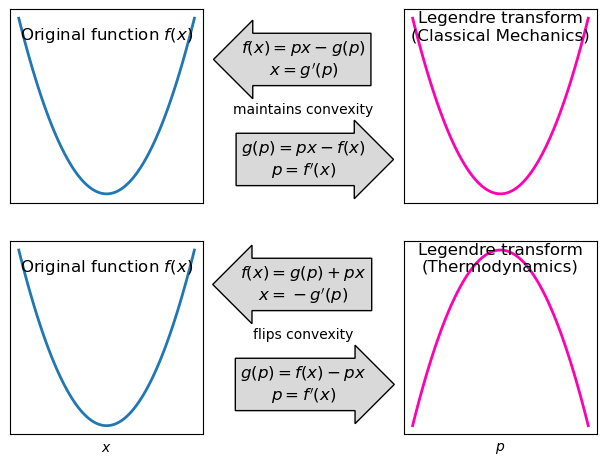

In [108]:
fig, ax = plt.subplots(2, 2, figsize=(8,5))
fig.subplots_adjust(left=0.10, right=0.90, top=0.95, bottom=0.10,
          hspace=0.20, wspace=0.60)

x = np.linspace(-2, 2, 100)
ax[0, 0].plot(x, x**2, label='$f(x) = x^2$', color='tab:blue', lw=2)
ax[1, 0].plot(x, x**2, label='$f(x) = x^2$', color='tab:blue', lw=2)

p = np.linspace(-3, 3, 100)
ax[0, 1].plot(p, p**2 / 4, label='$g(p) = (p/2)^2$', color='xkcd:bright pink', lw=2)
ax[1, 1].plot(p, -p**2 / 4, label='$-g(p) = -(p/2)^2$', color='xkcd:bright pink', lw=2)

for axis in ax.flatten():
    axis.set(xticks=[],
             yticks=[],
             )
    axis.set_box_aspect(1)


fig.text(0.50, 0.75, "maintains convexity", transform=fig.transFigure,
         ha='center', va='center', color="black",)
fig.text(0.50, 0.65, r"$g(p)=px-f(x)$"+"\n"+r"$p=f'(x)$", ha="center", va="center",
            size=12,
            bbox=dict(boxstyle="rarrow,pad=0.3", fc=3*[0.85], ec="black", lw=1))
fig.text(0.50, 0.85, r"$f(x)=px-g(p)$"+"\n"+r"$x=g'(p)$", ha="center", va="center",
            size=12,
            bbox=dict(boxstyle="larrow,pad=0.3", fc=3*[0.85], ec="black", lw=1))


fig.text(0.50, 0.30, "flips convexity", transform=fig.transFigure,
         ha='center', va='center', color="black",)
fig.text(0.50, 0.20, r"$g(p)=f(x)-px$"+"\n"+r"$p=f'(x)$", ha="center", va="center",
            size=12,
            bbox=dict(boxstyle="rarrow,pad=0.3", fc=3*[0.85], ec="black", lw=1))
fig.text(0.50, 0.40, r"$f(x)=g(p)+px$"+"\n"+r"$x=-g'(p)$", ha="center", va="center",
            size=12,
            bbox=dict(boxstyle="larrow,pad=0.3", fc=3*[0.85], ec="black", lw=1))

ax[0,0].set_title("Original function $f(x)$", y=0.8)
ax[0,1].set_title("Legendre transform\n(Classical Mechanics)", y=0.8)
ax[1,0].set_title("Original function $f(x)$", y=0.8)
ax[1,1].set_title("Legendre transform\n(Thermodynamics)", y=0.8)
ax[1,0].set_xlabel("$x$")
ax[1,1].set_xlabel("$p$");

The figure above summarizes all the procedures of the Legendre transformation in both conventions. See how the top convention is totally symmetric: if you replace $f$ and $x$ for $g$ and $p$, the equations remain the same. The bottom convention has two horrendous minus signs that break the symmetry. I really find it ugly and non intuitive. From now on let's keep using the top convention.

The best way to remember the Legendre transformation is this:

$$
f(x) + g(p) = p \cdot x.
$$

As it is written, we can't still interpret it. If we want the "forward" Legendre transform, we solve for $g$ and get $g(p)=p\cdot x - f(x)$, while for the "inverse" Legendre transform we solve for $f$ and get $f(x)=p\cdot x - g(p)$. As for the variables, there is not much to remember, each variable is defined as the derivative of the other function with respect to its variable: $p=f'(x)$ and $x=g'(p)$. Just simple and beautiful.

The equation above will the basis of a wonderful geometric intepretation of the Legendre transformation, which we shall see next.

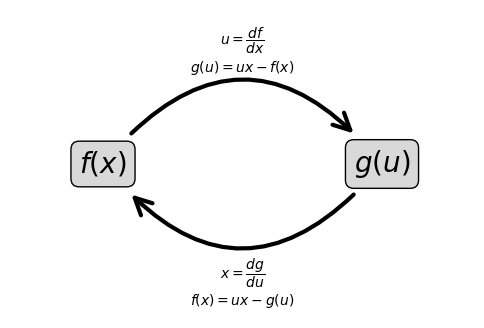

In [8]:
fig, ax = plt.subplots(figsize=(6,4))
plt.text(0.2, 0.5, r"$f(x)$",
         size=20, rotation=0,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec="black",
                   fc=[0.85]*3,
                   )
         )

plt.text(0.8, 0.5, r"$g(u)$",
         size=20, rotation=0,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec="black",
                   fc=[0.85]*3,
                   )
         )

ax.annotate("",
            xy=(0.8, 0.5), xycoords='data',
            xytext=(0.2, 0.5), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.6",
                            color="black",
                            shrinkA=30, shrinkB=30,
                            lw=3,
                            mutation_scale=30)
            )
ax.annotate("",
            xy=(0.2, 0.5), xycoords='data',
            xytext=(0.8, 0.5), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.6",
                            color="black",
                            shrinkA=30, shrinkB=30,
                            lw=3,
                            mutation_scale=30)
            )
ax.text(0.5, 0.8, r"$u=\dfrac{df}{dx}$"+"\n"+r"$g(u) = ux - f(x)$",
        ha="center")
ax.text(0.5, 0.2, r"$x=\dfrac{dg}{du}$"+"\n"+r"$f(x) = ux - g(u)$",
        ha="center", va="top")
ax.axis('off');

## derivation according to V.I. Arnold

We will follow now V.I. Arnold's arguments from his book [Mathematical Methods of Classical Mechanics](https://www.ceremade.dauphine.fr/~fejoz/Enseignement/ds2021/Arnold_1989_MMCM.pdf), 2nd edition, pages 61 to 64.

The geometric intution is great, but the text is nothing but obtuse, in my opinion. I'll put here Arnold's text and comment on it, with words, images and interactive widgets.

> **Legendre transformations**  
  The Legendre transformation is a very useful mathematical tool: it transforms functions on a vector space to functions on the dual space. Legendre transformations are related to projective duality and tangential coordinates in algebraic geometry and the construction of dual Banach spaces in analysis. They are often encountered in physics (for example, in the definition of thermodynamic quantities).

Great. I have no idea what a Banach space is. Nervermind. Let's continue.

> **Definition**  
  Let $y=f(x)$ be a convex function, $f''(x)>0$.  
  The *Legendre transformation* of the function $f$ is a new function $g$ of a new variable $p$, which is constructed in the following way (Figure 43). We draw the graph of $f$ in the $x,y$ plane. Let $p$ be a given number. Consider the straight line $y=px$. We take the point $x=x(p)$ at which the curve is farthest from the straight line in the vertical direction: for each $p$ the function $px-f(x)=F(p,x)$ has a maximum with respect to $x$ at the point $x(p)$. Now we define $g(p)=F(p,x(p))$.
>  
>  The point $x(p)$ is defined by the extremal condition $\partial F/\partial x=0$, i.e., $f'(x)=p$. Since $f$ is convex, the point $x(p)$ is unique.

![](arnold43.png){width="400"}

That's super interesting! Arnold doesn't start like we did, defining that $p$ is the slope of the tangent line. He starts from a straight line that passes through the origin, $y=px$, and looks for the point that maximizes the vertical distance between the function and the line. Since our function is convex, such a point must exist and be unique. In the widget we saw before, we varied $x_0$ and got to see how the negative y-intercept $g(p)$ changed. Arnold inverts this logic: he varies $p$ and looks for the point $x(p)$ that maximizes the vertical distance. See this in action:

::: {#interactive-container style="display: flex; flex-direction: column; align-items: center;"}

```{ojs}
//| echo: false

blue_color = "#0343df"
red_color = "#e50000"
light_blue_color = "#95d0fc"
// 1. Define the slider without a label to keep it tight
viewof p = Inputs.range([0, 4], {
  step: 0.1, 
  value: 2.5,
  width: 250
})

// 2. Create a centered row using a template literal
// This puts "Slope p" right next to the number box
html`<div style="display: flex; align-items: center; gap: 10px; font-weight: bold; font-family: sans-serif; margin-bottom: 15px;">
  <span>Slope p</span> ${viewof p}
</div>`

xo = p / 2

// 3. Define the plot
Plot.plot({
  grid: true,
  marginLeft: 60,
  marginBottom: 60,
  width: 600, 
  style: { fontSize: 14 },
  x: { domain: [0, 3], label: "x →", labelOffset: 45 },
  y: { domain: [-4, 8], label: "↑ y", labelOffset: 50 },
  marks: [
    Plot.axisX({fontSize: 20, fontWeight: "bold"}),
    Plot.axisY({fontSize: 20, fontWeight: "bold"}),

    // Parabola
    Plot.line(d3.range(0, 3.1, 0.1), {
      x: d => d,
      y: d => d ** 2,
      stroke: "black",
      strokeWidth: 4
    }),
    
    // Blue line
    Plot.line(d3.range(0, 3.1, 0.1), {
      x: d => d,
      y: d => p * d,
      stroke: blue_color,
      strokeWidth: 4
    }),

    // LIGHT Blue line
    Plot.link([null], {
      x1: 0, y1: -p * p / 4,
      x2: 3, y2: p*3 -p * p / 4,
      stroke: light_blue_color, strokeWidth: 2,
    }),

    // Red vertical segment
    Plot.link([null], {
      x1: p / 2, y1: (p ** 2) / 2,
      x2: p / 2, y2: (p ** 2) / 4,
      stroke: red_color, strokeWidth: 5
    }),

    // The gray thick straight line (Vertical segment)
    Plot.link([null], {
      x1: p / 2, y1: 0,
      x2: p / 2, y2: (p ** 2) / 4,
      stroke: "gray", strokeWidth: 5
    }),

    Plot.ruleY([0], {
      stroke: "#aaa",    // A light gray color
      strokeWidth: 2,    // Makes it "thin"
      strokeOpacity: 0.5 // Makes it subtle
    }),

    // TEXT LABELS
    Plot.text([null], {
      x: 2.7, y: 8, 
      text: ["f(x)"], 
      fontSize: 20, fontWeight: "bold", dy: -10 
    }),

    Plot.text([null], {
      x: 2, y: 2 * p, 
      text: ["px"], 
      fontSize: 20, fill: blue_color, textAnchor: "start", dx: 0, dy: 10 
    }),

    Plot.text([null], {
      x: p / 2, y: (p ** 2) * 3 / 8, 
      text: ["g(p)"], 
      fontSize: 15, fill: red_color, fontWeight: "bold", dy: 0, dx: 20 
    }),

    Plot.text([null], {
      x: p / 2, y: (p ** 2) * 1 / 8, 
      text: ["f(x)"], 
      fontSize: 15, fill: "black", fontWeight: "bold", dy: 0, dx: 20 
    }),

    Plot.text([null], {
      x: p / 2, y: 0, 
      text: ["x(p)"], 
      fontSize: 16, fontWeight: "bold", dx: 0, dy: 10, fill: "black", 
    }),
  ]
})
```

We find that the derivative has something to do with this procedure only when we go about finding the **maximum distance**. Arnold calls the vertical distance between the line $px$ in blue and the function $f(x)$ in black as $F(p,x) = px - f(x)$. To find the maximum distance, we set the derivative of $F$ with respect to $x$ to zero:

\begin{align*}
\frac{\partial F}{\partial x} = p - f'(x) &= 0\\
p &= f'(x).
\end{align*}

Only at this stage in the argument we find that $p$ is the derivative of $f$ at the point $x(p)$! I added a light blue line to connect this argument with the previous widget. The light blue line is $px$ shifted down by $g(p)$, so its y-intercept is exactly $-g(p)$.

One more thing. If we sum the vertical height given by $f(x)$ (gray) and the vertical height given by $g(p)$ (red), we get exactly the vertical height of the blue line $px$, that is, the symmetric equation from before:

$$
f(x) + g(p) = p \cdot x.
$$

Let's keep going with Arnold's text.

> **Involutivity**  
  Let us consider a function $f$ which is differentiable as many times as necessary, with $f''(x) > 0$. It is easy to verify that a Legendre transformation takes convex functions to convex functions. Therefore, we can apply it twice.

Indeed, we already verified that this definition of the Legendre transformation maintains convexity for a specific function.

> **Theorem.** The Legendre transformation is involutive, i.e., its square is the identity: if under the Legendre transformation $f$ is taken to $g$, then the Legendre transform of $g$ will again be $f$.

I don't love Arnold's prose, but this is great.

> **Proof.** In order to apply the Legendre transform to $g$, with variable $p$, we must by definition look at a new independent variable (which we will call $x$), construct the function
  $$
  G(x, p) = xp - g(p),
  $$
  and find the point $p(x)$ at which $G$ attains its maximum: $\partial G/\partial p = 0$, i.e., $g'(p) = x$. Then the Legendre transform of $g(p)$ will be the function of $x$ equal to $G(x, p(x))$.    
>
>We will show that $G(x, p(x)) = f(x)$. To this end we notice that $G(x, p) = xp - q(p)$ has a simple geometric interpretation: it is the ordinate of the point with abscissa $x$ on the line tangent to the graph of $f(x)$ with slope $p$ (Figure 45). For fixed $p$, the function $G(x, p)$ is a linear function of $x$, with $\partial G/\partial x = p$, and for $x = x(p)$ we have $G(x, p) = xp - g(p) = f(x)$ by the definition of $g(p)$.  
>
>  Let us now fix $x = x_0$ and vary $p$. Then the values of $G(x,p)$ will be the ordinates of the points of intersection of the line $x=x_0$ with the line tangen to the graph of $f(x)$ with various slopes $p$. By the convexity of the graph it follows that all these tangents lie below the curve, and therefore the maximum of $G(x,p)$ for a fixed $x(p_0)$ is equal to $f(x)$ (and is achieed for $p=p(x_0)=f'(x_0)$).
